In [12]:
import pandas as pd

# Just use the filename, no folder prefix
results_df = pd.read_csv("results.csv")

print(results_df.head())


          home_team         away_team  home_goals  away_goals result  \
0  Sheffield United         Liverpool         1.0         1.0      D   
1           Arsenal       Aston Villa         1.0         1.0      D   
2           Everton           Watford         2.0         1.0      H   
3  Newcastle United    Wigan Athletic         2.0         1.0      H   
4        Portsmouth  Blackburn Rovers         3.0         0.0      H   

      season  
0  2006-2007  
1  2006-2007  
2  2006-2007  
3  2006-2007  
4  2006-2007  


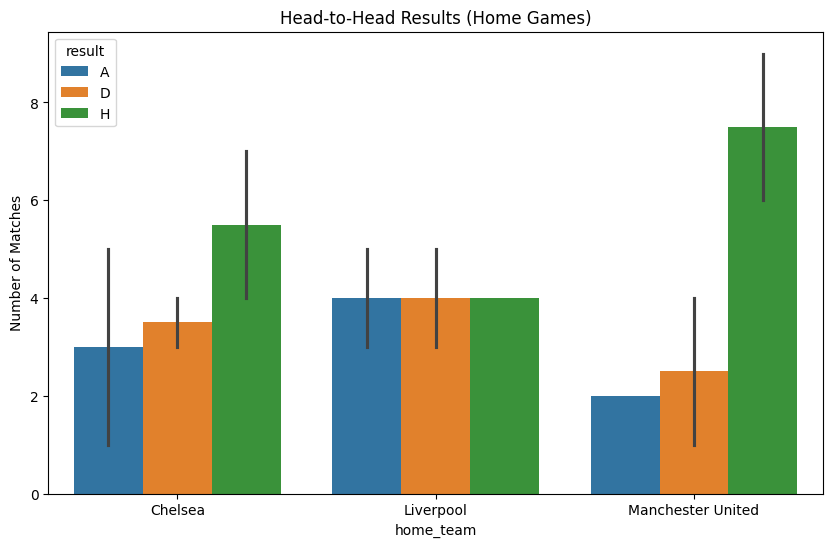

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter only the rivalries
big3 = ["Chelsea", "Liverpool", "Manchester United"]
rivalries = results_df[
    (results_df['home_team'].isin(big3)) & (results_df['away_team'].isin(big3))
]

# Count results
h2h_counts = rivalries.groupby(['home_team', 'away_team', 'result']).size().reset_index(name='count')

plt.figure(figsize=(10,6))
sns.barplot(data=h2h_counts, x="home_team", y="count", hue="result")
plt.title("Head-to-Head Results (Home Games)")
plt.ylabel("Number of Matches")
plt.show()


First try Native bias / K-n with chat

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Load data
df = pd.read_csv("results.csv")

# Features = home_team, away_team
X = df[['home_team', 'away_team']]
y = df['result']

# Encode categorical variables (force dense output for NB compatibility)
categorical_features = ['home_team', 'away_team']
preprocessor_dense = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ]
)

preprocessor_sparse = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- kNN Model (works fine with sparse) ---
knn_clf = Pipeline(steps=[
    ('preprocessor', preprocessor_sparse),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)
print("kNN Results:\n", classification_report(y_test, y_pred_knn))

# --- Naive Bayes Model (needs dense) ---
nb_clf = Pipeline(steps=[
    ('preprocessor', preprocessor_dense),
    ('classifier', GaussianNB())
])

nb_clf.fit(X_train, y_train)
y_pred_nb = nb_clf.predict(X_test)
print("Naive Bayes Results:\n", classification_report(y_test, y_pred_nb))



kNN Results:
               precision    recall  f1-score   support

           A       0.40      0.51      0.45       258
           D       0.29      0.20      0.23       233
           H       0.56      0.57      0.56       421

    accuracy                           0.46       912
   macro avg       0.42      0.42      0.41       912
weighted avg       0.45      0.46      0.45       912

Naive Bayes Results:
               precision    recall  f1-score   support

           A       0.41      0.68      0.51       258
           D       0.24      0.03      0.06       233
           H       0.59      0.62      0.60       421

    accuracy                           0.49       912
   macro avg       0.41      0.45      0.39       912
weighted avg       0.45      0.49      0.44       912

